# Combing Likelihoods

In [9]:
import os
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import json 
import pickle
import bilby
import get_bilby_data as gbd
from sklearn.neighbors import KernelDensity

In [10]:
def get_H0_KDE(lum_d_samples, zt, di, df, N):
    '''
    Returns a posterior density distirbution KDE for H0 based
    on the set of input distance samples associated with a given event/instance
    
    PARAMETERS:
    ----------
        lum_d_samples: a python array object containing sampled distance positions
        zt: a redshift value associated with the event
        di: the bottom of the distance sampling interval [di, df]
        df: the top of the distance sampling interval [di, df]
        N: the step size of the distance sampling interval 
    '''
    
    #set a value for C
    c=299792.45
    
    #convert the data into a numpy array
    d_samples=np.array(lum_d_samples)
    
    #build the H0 histogram 
    H0_samples=zt*c/d_samples
    
    #given that the distance samples range over [di, df], resolution N,
    #create and H0 axis with the appropriate parameters 
    H0_axis = np.linspace(zt*c/df, zt*c/di, N)

    #create the probability density via KDE process 
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(H0_samples[:, None])
    logprob = kde.score_samples(H0_axis[:, None])
    H0_D=np.exp(logprob)

    #return H0 posterior 
    return H0_D   #<----MADE CHANGE HERE FOR TESTING PURPOSES!!!!!!!!!!


In [11]:
def get_mod_likelihood(posterior, zt, di, df, N):
    '''
    Returns a likelihood (mod evidence) KDE for H0 based
    on the set of input distance samples associated with a given event/instance
    
    PARAMETERS:
    ----------
        posteiror: posterior density distirbution KDE for H0
        zt: a redshift value associated with the event
        di: the bottom of the distance sampling interval [di, df]
        df: the top of the distance sampling interval [di, df]
        N: the step size of the distance sampling interval 
    '''
    
    #set a value for C
    c=299792.45
    
    #build a uniform H0 prior over the range [Hi, Hf]
    Hi, Hf = zt*c/df, zt*c/di
    H0_prior=np.full(N, 1/(Hf-Hi))
    
    #test prior integral sums to ~1
    dH0=(Hf-Hi)/N
    print('H0 prior sum test: ', sum(H0_prior)*dH0)
    
    #return the modified likelihood, e.g. the likelihood
    #without the evidence term
    mod_Likelihood=posterior/H0_prior
    
    return mod_Likelihood
    

In [12]:
def plot_kde_sample_comparsion(lum_dist, H0_GW_posterior, H0, zt, di, df, N):
    '''
    Returns a plot displaying sample H0 values overlayed 
    
    PARAMETERS:
    ----------
        posteiror: posterior density distirbution KDE for H0
        zt: a redshift value associated with the event
        di: the bottom of the distance sampling interval [di, df]
        df: the top of the distance sampling interval [di, df]
        N: the step size of the distance sampling interval 
    ''' 

    c=299792.45
    
    #define H0 interval start/end-points, differential, and axis
    Hi, Hf = zt*c/df, zt*c/di
    dH0=(Hf-Hi)/N
    H0_axis=np.linspace(Hi, Hf, N)

    data_copy=np.array(lum_dist)  #copy over data
    h0_data=c*zt/data_copy        #convert distance samples to H0 samples 

    pyplot.rcParams.update({'font.size': 18})
    pyplot.figure(figsize=(12,10))

    pyplot.plot(H0_axis,H0_GW_posterior, alpha=1,color=(1,0,0))  #plot KDE
    pyplot.hist(h0_data, bins=200, alpha=0.4, density=True);     #plot h0_data
    ax = pyplot.gca()
    ylim = ax.get_ylim()
    pyplot.plot([H0, H0], ylim, 'r--')
    pyplot.ylim(ylim)
    pyplot.show()

In [36]:
cd ..

/Users/rickwilde/Desktop/Fall 2021/summer_research/git/GW_Bilby_Events/bilby_runs


In [88]:
#import data
path="bilby_0.4_0.73_followup_2/bilby_0.4_0.73_followup_2_result.json"
data=gbd.get_bilby_data(path)
lum_dist=data[0][5]


#define 'by-run' constants/static constants
d_true, di, df = 50, 10, 1000
N=1000

H0_true, c = 70, 299792.45
zt = d_true*H0_true/c


#define H0 interval start/end-points, differential, and axis
Hi, Hf = zt*c/df, zt*c/di
dH0=(Hf-Hi)/N
H0_axis=np.linspace(Hi, Hf, N)


#build posterior
H0_GW_posterior=get_H0_KDE(lum_dist, zt, di, df, N)

#test that sums evaluate properly over H0
print('H0 posterior sum test: ', sum(H0_GW_posterior)*dH0)


#define likelihood
likelihood=get_mod_likelihood(H0_GW_posterior, zt, di, df, N)


#plot
pyplot.fill_between(H0_axis, likelihood, alpha=1,color=(0,0,1))
ax = pyplot.gca()
ylim = ax.get_ylim()
pyplot.plot([H0_true, H0_true], ylim, 'r--')
pyplot.ylim(ylim)
pyplot.show()

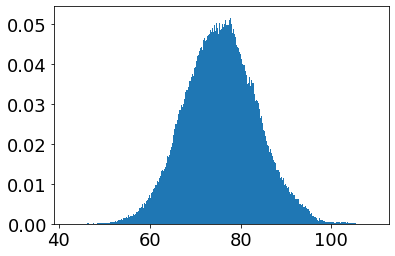

In [101]:
pyplot.hist(H0_GW_posterior.sample(1000000), bins=1000, density=True);

# Plot Comparisons

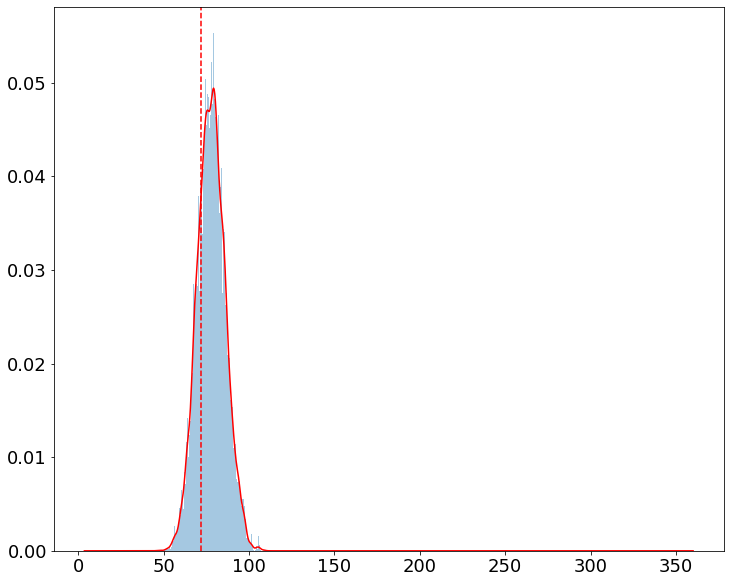

In [8]:
# lets compare our KDEs to our sample data 
path="bilby_0.4_0.73_followup_2/bilby_0.4_0.73_followup_2_result.json"
data=gbd.get_bilby_data(path)
lum_dist=data[0][5]

H0_true, c = 72, 299792.45
d_true, di, df = 50, 10, 1000
zt = d_true*H0_true/c
N=1000

H0_GW_posterior=get_H0_KDE(lum_dist, zt, di, df, N)


plot_kde_sample_comparsion(lum_dist, H0_GW_posterior, 72, zt, di, df, N)

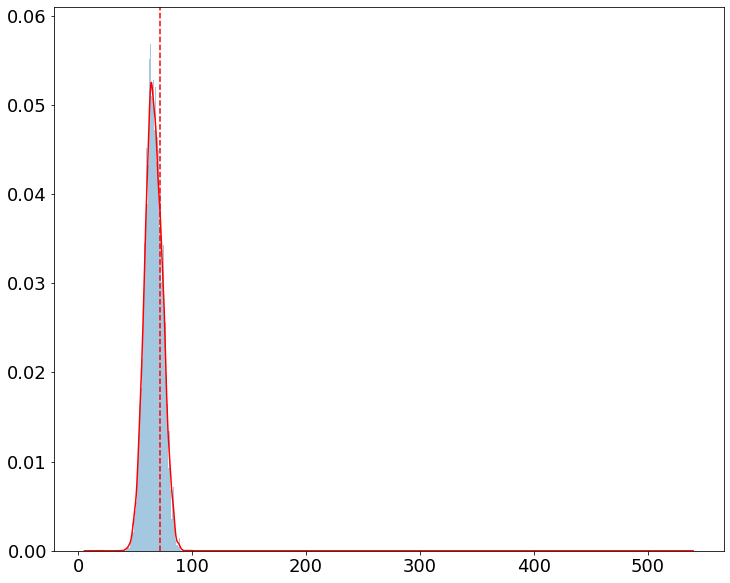

In [11]:
path="bilby_3.0_-1.2_followup/bilby_3.0_-1.2_followup_result.json"

data=gbd.get_bilby_data(path)
lum_dist=data[0][5]

H0_true, c = 72, 299792.45
d_true, di, df = 75, 10, 1000
zt = d_true*H0_true/c
N=1000

H0_GW_posterior=get_H0_KDE(lum_dist, zt, di, df, N)


plot_kde_sample_comparsion(lum_dist, H0_GW_posterior, 72, zt, di, df, N)

# Combing Multiple Events

In [4]:
def get_dir_bilby_data():
    '''given that your in a bilby_run_... dir, this script pulls all data'''
    ra_dec=[file[6:].split('_') for file in os.listdir() if file[:5]=='bilby']
    ra_dec=[ [float(ra_dec[i][0]),float(ra_dec[i][1])] for i in range(len(ra_dec))]

    #get full result.json data for each run, and place it in 'data' array
    data=[]
    for run in ra_dec:
        path='bilby_{}_{}/bilby_{}_{}_result.json'.format(run[0],run[1],run[0],run[1])
        result=gbd.get_bilby_data(path)
        data.append(result)
    
    return data

In [20]:
cd ../bilby_runs_3.0_-1.2/

[Errno 2] No such file or directory: '../bilby_runs_3.0_-1.2/'
/Users/rickwilde/Desktop/Fall 2021/summer_research/git/GW_Bilby_Events/bilby_runs


H0 posterior sum test:  0.9989999999993047
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9989999999994768
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9989999999996036
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9937732452635277
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9357987698733035
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9716360840961813
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9989999999976674
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9989791817337509
H0 prior sum test:  0.9999999999999851
H0 posterior sum test:  0.9989999998752891
H0 prior sum test:  0.9999999999999851


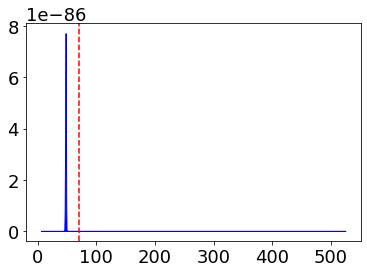

In [34]:
#pull in current dir's data
data=get_dir_bilby_data()

#define 'by-run' constants
d_true, di, df = 75, 10, 1000
N=1000

#define static constants
H0_true, c = 70, 299792.45
zt = d_true*H0_true/c

#build axis for plotting purposes
Hi, Hf = zt*c/df, zt*c/di
H0_axis=np.linspace(Hi, Hf, N)
dH0=(Hf-Hi)/N

final_likelihood=np.full(N,1)  #initalize likelihood product

for run in data:
    H0_GW_posterior=get_H0_KDE(run[0][5], zt, di, df, N)
    print('H0 posterior sum test: ', sum(H0_GW_posterior)*dH0)
    likelihood=get_mod_likelihood(H0_GW_posterior, zt, di, df, N)
    final_likelihood=final_likelihood*likelihood


    
#plot
pyplot.fill_between(H0_axis, final_likelihood, alpha=1,color=(0,0,1))
ax = pyplot.gca()
ylim = ax.get_ylim()
pyplot.plot([H0_true, H0_true], ylim, 'r--')
pyplot.ylim(ylim)
pyplot.show()

In [23]:
cd bilby_runs_0.4_0.73/

/Users/rickwilde/Desktop/Fall 2021/summer_research/git/GW_Bilby_Events/bilby_runs/bilby_runs_0.4_0.73


H0 posterior sum test:  0.9998959326661742
H0 prior sum test:  1.0000000000002198
H0 posterior sum test:  0.999899999999227
H0 prior sum test:  1.0000000000002198


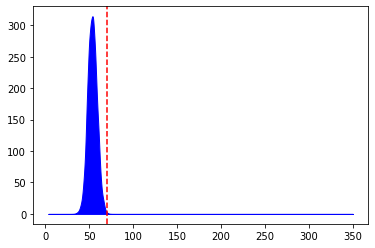

In [30]:
#pull in current dir's data
data=get_dir_bilby_data()

#define 'by-run' constants
d_true, di, df = 50, 10, 1000
N=10000

#define static constants
H0_true, c = 70, 299792.45
zt = d_true*H0_true/c

#build axis for plotting purposes
Hi, Hf = zt*c/df, zt*c/di
H0_axis=np.linspace(Hi, Hf, N)
dH0=(Hf-Hi)/N

final_likelihood=np.full(N,1)  #initalize likelihood product

for run in data:
    H0_GW_posterior=get_H0_KDE(run[0][5], zt, di, df, N)
    print('H0 posterior sum test: ', sum(H0_GW_posterior)*dH0)
    likelihood=get_mod_likelihood(H0_GW_posterior, zt, di, df, N)
    final_likelihood=final_likelihood*likelihood


pyplot.fill_between(H0_axis, final_likelihood, alpha=1,color=(0,0,1))
ax = pyplot.gca()
ylim = ax.get_ylim()
pyplot.plot([H0_true, H0_true], ylim, 'r--')
pyplot.ylim(ylim)
pyplot.show()

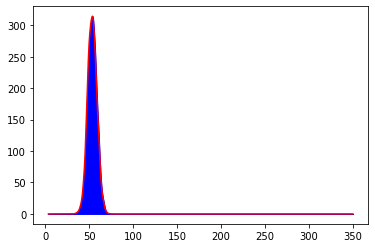

In [95]:
#demonstrate the red plot/ likelihood plot are equivalent
pyplot.fill_between(H0_axis, final_likelihood, alpha=1,color=(0,0,1))
pyplot.plot(H0_axis, final_likelihood, color='r')

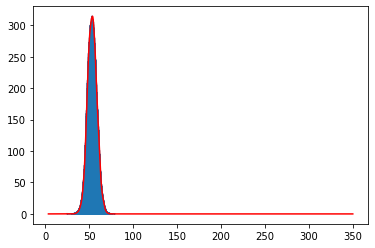

In [101]:
import random

#sample points with weights according to the likelihood
LH_samples=random.choices(H0_axis, final_likelihood, k=1000000)

#get the proper resolution size for the sample histogram
H_N=len(H0_axis)

#histogram data/axis via numpy
np_hist=np.histogram(LH_samples,H_N)

#get samples
np_samp=np_hist[0]

#get axis; remove +1 axis size thing
axis=np_hist[1][0:H_N]

#scale samples 
scale_samp=max(final_likelihood)*(np_samp/max(np_samp))

#plot samples and true likelihood 
pyplot.plot(axis,scale_samp)
pyplot.plot(H0_axis, final_likelihood, color='r')

In [154]:
H0_true, c = 72, 299792.45
d_true, di, df = 50, 10, 1000
zt = d_true*H0_true/c
N=1000

H0_GW_posterior=get_H0_KDE(samples, zt, di, df, N)

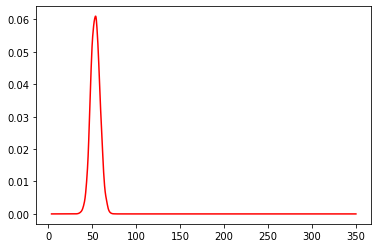

In [14]:
pyplot.plot(H0_axis,normalized, alpha=1,color=(1,0,0))

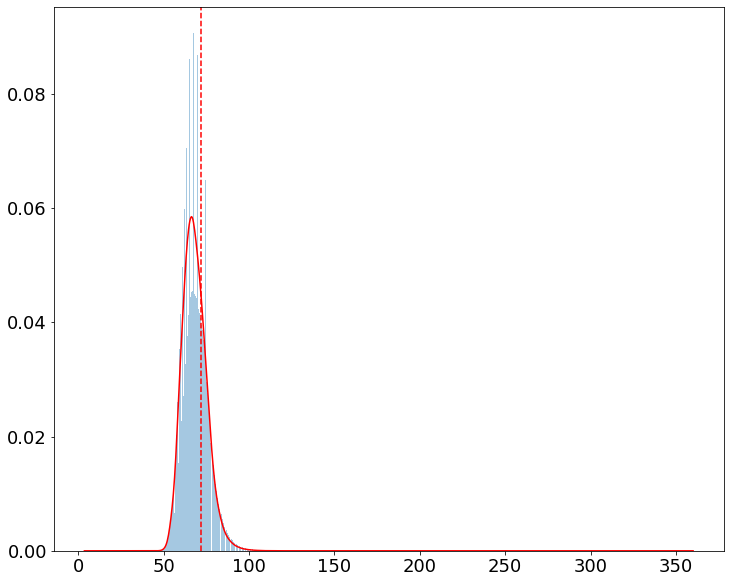

In [155]:
plot_kde_sample_comparsion(samples, H0_GW_posterior, 72, zt, di, df, N)

# Combining trueloc/ followup event data

In [7]:
cd ..

/Users/rickwilde/Desktop/Fall 2021/summer_research/git/GW_Bilby_Events/bilby_runs


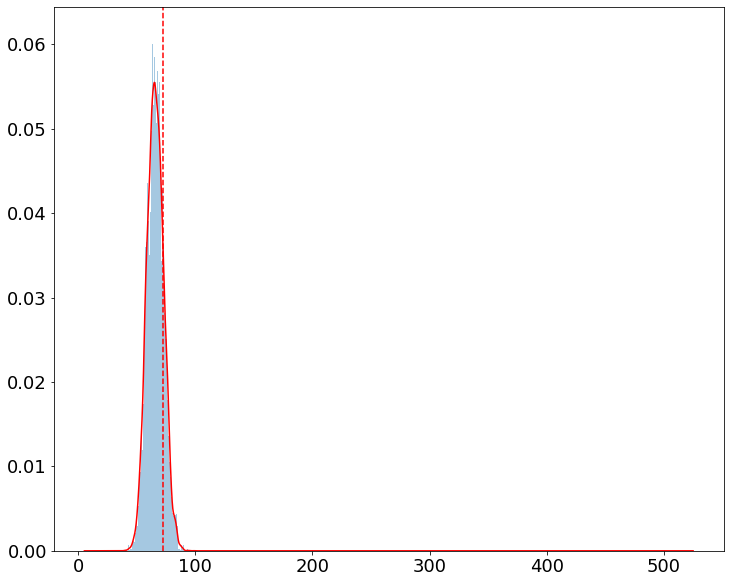

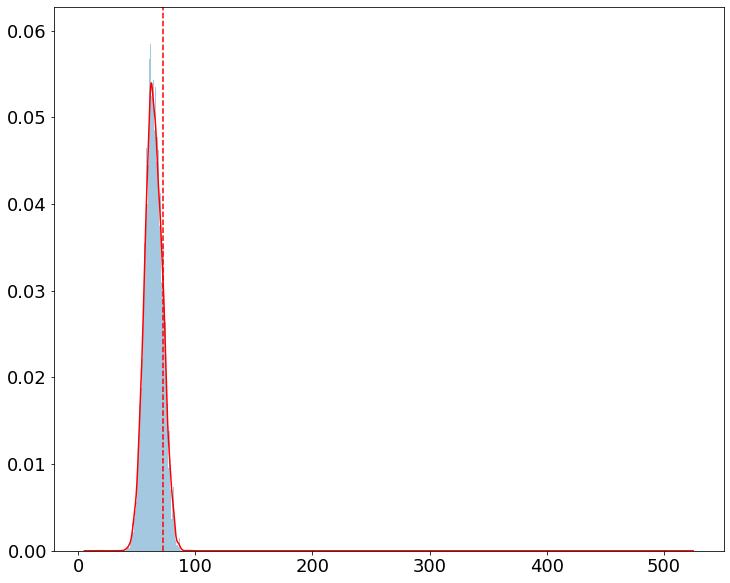

H0 posterior sum test:  0.999899999999311
H0 prior sum test:  0.9999999999999686
H0 posterior sum test:  0.9998999999994185
H0 prior sum test:  0.9999999999999686


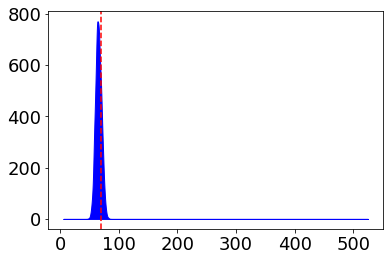

In [18]:
#In this block you were examining the 5.445, 0.0 data followup/trueloc.
#then went back, examined (0.4, 0.73) data followup/trueloc.

#  1. you pull in the data from the given paths
#  2. you plotted the individual distirbutions 
#  3. you pltoted the combined distributions
#you noticed something concerning in the data shape, looks really weirdly peaked

""" -----------1. get all path data/ intialize constants of the problem ---------------"""

data2=gbd.get_bilby_data("bilby_runs_3.0_-1.2/bilby_3.0_-1.2_followup/bilby_3.0_-1.2_followup_result.json")
data1=gbd.get_bilby_data("bilby_runs_3.0_-1.2/bilby_3.0_-1.2/bilby_3.0_-1.2_result.json")

#define 'by-run' constants
d_true, di, df = 75, 10, 1000
N=10000

#define static constants
H0_true, c = 70, 299792.45
zt = d_true*H0_true/c

#build axis for plotting purposes
Hi, Hf = zt*c/df, zt*c/di
H0_axis=np.linspace(Hi, Hf, N)
dH0=(Hf-Hi)/N


""" -----------2. create followup KDE ---------------"""
lum_dist_1=data1[0][5]
H0_GW_posterior_1=get_H0_KDE(lum_dist_1, zt, di, df, N)
plot_kde_sample_comparsion(lum_dist_1, H0_GW_posterior_1, 72, zt, di, df, N)

""" -----------2. create true locaiton KDE ---------------"""
lum_dist_2=data2[0][5]
H0_GW_posterior_2=get_H0_KDE(lum_dist_2, zt, di, df, N)
plot_kde_sample_comparsion(lum_dist_2, H0_GW_posterior_2, 72, zt, di, df, N)



""" -----------3. below is all the stuff for combining the data ---------------"""
data=[data1, data2]


final_likelihood=np.full(N,1)  #initalize likelihood product

for run in data:
    H0_GW_posterior=get_H0_KDE(run[0][5], zt, di, df, N)
    print('H0 posterior sum test: ', sum(H0_GW_posterior)*dH0)
    likelihood=get_mod_likelihood(H0_GW_posterior, zt, di, df, N)
    final_likelihood=final_likelihood*likelihood


pyplot.fill_between(H0_axis, final_likelihood, alpha=1,color=(0,0,1))
ax = pyplot.gca()
ylim = ax.get_ylim()
pyplot.plot([H0_true, H0_true], ylim, 'r--')
pyplot.ylim(ylim)
pyplot.show()



# Other Sampler Approach

In [2]:
import numpy as np
import emcee

In [65]:
#get the length
N=len(final_likelihood)
loglike=np.full(N,0)

#map FL=0 values to -1000000/ - inf
#map others to np.log(FL)
for i in range(N):
    if (final_likelihood[i]==0):
        loglike[i]=-100000000
    else:
        loglike[i]=np.log(final_likelihood[i])

def log_prob(x):
    ''' given a likelihood function, the below
    constructs the log likelihood through a mapping
    1. if FL=0 anywhere, map the log to -100000
    2. if the x value falls out the specified range,
        map to 0, and therfore -100000
    3. otherwise map the x value to the descretived 
        value np.log(FL)
    '''

    #scale and translate x coords to array-space coords
    array_coord=int(np.floor(x/dH0)-np.floor(Hi/dH0))
    
    #map vlaues outside range to -inf 
    # return interior values 
    if ( (array_coord<0) or (len(loglike)<=array_coord) ):
        return -100000000
    else:
        return loglike[array_coord]

In [70]:
ndim=1
nwalkers = 2

np.random.seed(42)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

p0 = np.random.rand(nwalkers, ndim)
state = sampler.run_mcmc(p0, 100)

sampler.reset()
x=sampler.run_mcmc(state, 1000000);

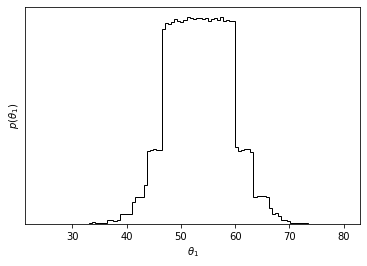

In [71]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);